In [10]:
import random
import numpy as np
import cv2 as cv
import ppg_init as ppg
import seqeval
import ipywidgets as widgets
import evolutionary_algorithms as ea
from matplotlib import pyplot as plt
import pandas as pd

DEBUGMODE = False

In [2]:
number_gray = np.zeros((ppg.NO_SYMBOLS, ppg.IMG_WIDTH ,ppg.IMG_HEIGHT))
for i in range (ppg.NO_SYMBOLS):
    number_image = cv.imread(ppg.IMAGE_PATH+' '+str(i)+' dilated.png')
    number_gray[i] = cv.cvtColor(number_image, cv.COLOR_BGR2GRAY)

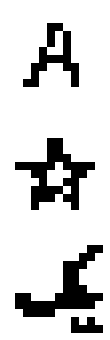

In [3]:
stride = 25
lrbp_threshold = 10 # low resolution black pixels threshold. 
# this is used when we want to count the number of the black pixels in the high resolution image
# and decide whether to mark the corresponding pixel in low resolution image black.
new_imgw = int(ppg.IMG_WIDTH/stride)
new_imgh = int(ppg.IMG_HEIGHT/stride)
new_img = np.ones((ppg.NO_SYMBOLS, new_imgw, new_imgh))*255
new_img2 = np.ones((ppg.NO_SYMBOLS, new_imgw, new_imgh))*255
# stride is always an odd number.

for i in range(ppg.NO_SYMBOLS):
    my_img = number_gray[i]
    # jump a 3,3 square and check for any black pixel within the area.

    for x in range(0, len(my_img), stride):
        for y in range(0, len(my_img[x]), stride):
            # stride is always an odd number.
            offset = int((stride-1)/2)
            new_x = int(x/stride)
            new_y = int(y/stride)
            black_pxl_vec = my_img[x-offset:x+offset+1,y-offset:y+offset+1]<50
            black_pxl_num = np.sum(black_pxl_vec)
#             print(has_black_pxl, end=' ')
            if(black_pxl_num>lrbp_threshold): # has at least one black pixel
                new_img[i,new_x,new_y] = 0
#         print(' ')
#     print('====================')
ppg.plot_digits(new_img)

In [4]:
new_img.shape

(3, 12, 12)

In [5]:
sequence_num = []
for symbol in range(ppg.NO_SYMBOLS):
    sequence = []
    for row in range(len(new_img[symbol])):
        for col in range(len(new_img[symbol, row])):
            if new_img[symbol, row, col]==0:
                sequence.append((row, col))
    sequence_num.append(sequence)
    if(DEBUGMODE):
        print('black pixels list for number ', symbol, ':')
        print(len(sequence), '\n')
        
if(DEBUGMODE):
    print(sequence_num)

black pixels list for number  0 :
21 

black pixels list for number  1 :
35 

black pixels list for number  2 :
42 

[[(2, 5), (2, 6), (3, 5), (3, 7), (4, 5), (4, 7), (5, 4), (5, 7), (6, 4), (6, 5), (6, 6), (6, 7), (7, 3), (7, 4), (7, 7), (7, 8), (8, 3), (8, 8), (9, 2), (9, 3), (9, 8)], [(2, 5), (2, 6), (3, 5), (3, 6), (4, 5), (4, 6), (4, 7), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 7), (5, 8), (5, 9), (5, 10), (6, 3), (6, 4), (6, 8), (6, 9), (7, 4), (7, 7), (7, 8), (8, 3), (8, 4), (8, 5), (8, 6), (8, 8), (9, 3), (9, 4), (9, 5), (9, 7), (9, 8), (10, 3), (10, 8)], [(1, 10), (1, 11), (2, 9), (2, 10), (3, 7), (3, 8), (3, 9), (4, 7), (4, 8), (5, 7), (5, 8), (6, 7), (6, 8), (6, 9), (7, 1), (7, 2), (7, 6), (7, 7), (7, 8), (7, 9), (7, 10), (7, 11), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (8, 10), (9, 2), (9, 3), (9, 4), (9, 5), (10, 8), (10, 10), (11, 8), (11, 9), (11, 10), (11, 11)]]


In [6]:
ea.DIGIT=0
ea.P_MUTATION = 0.8
ea.P_CROSSOVER = 1.0
ea.POPULATION_SIZE = 500
ea.MAX_NUM_OF_GEN = 1500

0.


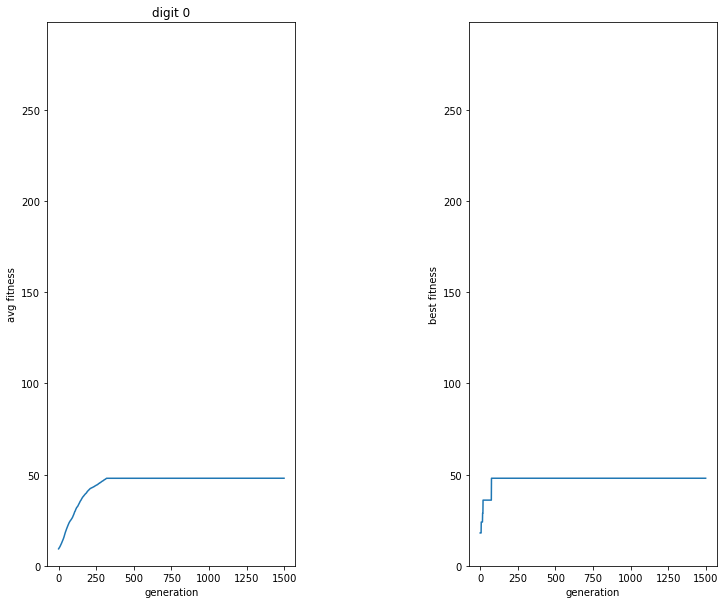

In [11]:
fig = plt.figure(figsize=(12,10))
fig.subplots_adjust(hspace=1,wspace=0.7)
print(0,'.',sep='')
sol_num = []
i = 0
ea.DIGIT=i
(generation_profile, 
avg_fitness_profile, 
best_fitness_profile, 
best_ind_pheno_profile) = ea.train_evolve(mutation=ea.swap_mutation,
            crossover=ea.edge_recombination,
            parent_sel=ea.from_population_best_parents_select, 
            get_parents_pair_method=ea.get_parents_pair_nodup,
            population_sel=ea.best_population_select, 
            population_init=ea.population_init, 
            population_terminate=ea.population_terminate, 
            vertices=sequence_num,
            desired_pheno=new_img,
            fitness_func=ea.fitness_func,
            geno2pheno=ea.geno2pheno)
plt.subplot(1,2,1)
plt.plot(generation_profile,avg_fitness_profile)
plt.title('digit '+str(ea.DIGIT))
plt.ylabel('avg fitness')
plt.xlabel('generation')
plt.ylim(0,(ppg.LOW_RESOLUTION_IMG_SIZE**2) *2 + 10);

plt.subplot(1,2,2)
plt.plot(generation_profile,best_fitness_profile)
plt.ylabel('best fitness')
plt.xlabel('generation')
plt.ylim(0,(ppg.LOW_RESOLUTION_IMG_SIZE**2) *2 + 10);
sol_num.append(best_ind_pheno_profile[-1])

0.


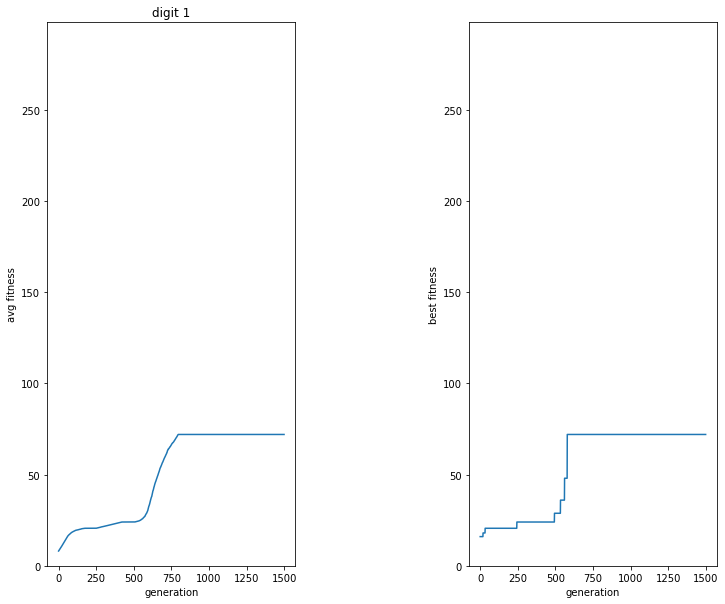

In [12]:
fig = plt.figure(figsize=(12,10))
fig.subplots_adjust(hspace=1,wspace=0.7)
print(0,'.',sep='')
sol_num = []
i = 1
ea.DIGIT=i
(generation_profile, 
avg_fitness_profile, 
best_fitness_profile, 
best_ind_pheno_profile) = ea.train_evolve(mutation=ea.swap_mutation,
            crossover=ea.edge_recombination,
            parent_sel=ea.from_population_best_parents_select, 
            get_parents_pair_method=ea.get_parents_pair_nodup,
            population_sel=ea.best_population_select, 
            population_init=ea.population_init, 
            population_terminate=ea.population_terminate, 
            vertices=sequence_num,
            desired_pheno=new_img,
            fitness_func=ea.fitness_func,
            geno2pheno=ea.geno2pheno)
plt.subplot(1,2,1)
plt.plot(generation_profile,avg_fitness_profile)
plt.title('digit '+str(ea.DIGIT))
plt.ylabel('avg fitness')
plt.xlabel('generation')
plt.ylim(0,(ppg.LOW_RESOLUTION_IMG_SIZE**2) *2 + 10);

plt.subplot(1,2,2)
plt.plot(generation_profile,best_fitness_profile)
plt.ylabel('best fitness')
plt.xlabel('generation')
plt.ylim(0,(ppg.LOW_RESOLUTION_IMG_SIZE**2) *2 + 10);
sol_num.append(best_ind_pheno_profile[-1])

0.


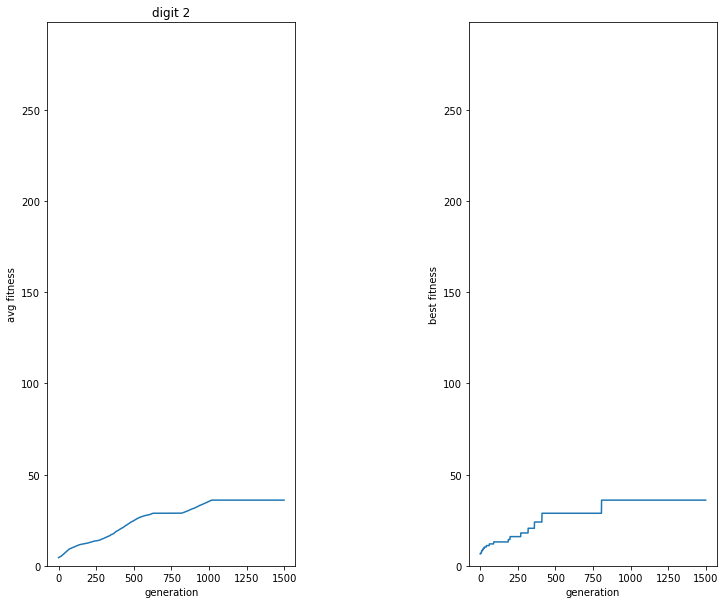

In [13]:
fig = plt.figure(figsize=(12,10))
fig.subplots_adjust(hspace=1,wspace=0.7)
print(0,'.',sep='')
sol_num = []
i = 2
ea.DIGIT=i
(generation_profile, 
avg_fitness_profile, 
best_fitness_profile, 
best_ind_pheno_profile) = ea.train_evolve(mutation=ea.swap_mutation,
            crossover=ea.edge_recombination,
            parent_sel=ea.from_population_best_parents_select, 
            get_parents_pair_method=ea.get_parents_pair_nodup,
            population_sel=ea.best_population_select, 
            population_init=ea.population_init, 
            population_terminate=ea.population_terminate, 
            vertices=sequence_num,
            desired_pheno=new_img,
            fitness_func=ea.fitness_func,
            geno2pheno=ea.geno2pheno)
plt.subplot(1,2,1)
plt.plot(generation_profile,avg_fitness_profile)
plt.title('digit '+str(ea.DIGIT))
plt.ylabel('avg fitness')
plt.xlabel('generation')
plt.ylim(0,(ppg.LOW_RESOLUTION_IMG_SIZE**2) *2 + 10);

plt.subplot(1,2,2)
plt.plot(generation_profile,best_fitness_profile)
plt.ylabel('best fitness')
plt.xlabel('generation')
plt.ylim(0,(ppg.LOW_RESOLUTION_IMG_SIZE**2) *2 + 10);
sol_num.append(best_ind_pheno_profile[-1])

In [7]:
low_res_drawing = cv.imread('..\\data\\low resolution drawings\\symbol 0.png')
low_res_drawing_gray = cv.cvtColor(low_res_drawing, cv.COLOR_BGR2GRAY)

In [8]:
sequence = []
for row in range(len(low_res_drawing_gray)):
    for col in range(len(low_res_drawing_gray[row])):
        if low_res_drawing_gray[row, col]==0:
            sequence.append((row, col))
sequence_num.append(sequence)
if(DEBUGMODE):
    print('black pixels list for number ', symbol, ':')
    print(len(sequence), '\n')
        
if(DEBUGMODE):
    print(sequence_num[-1])
#     print(len(sequence_num))

black pixels list for number  2 :
28 

[(1, 4), (1, 5), (1, 6), (2, 3), (2, 7), (3, 3), (3, 7), (4, 4), (4, 5), (4, 6), (5, 5), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (7, 5), (8, 5), (9, 4), (9, 6), (10, 3), (10, 7), (11, 2), (11, 8)]
4


0.


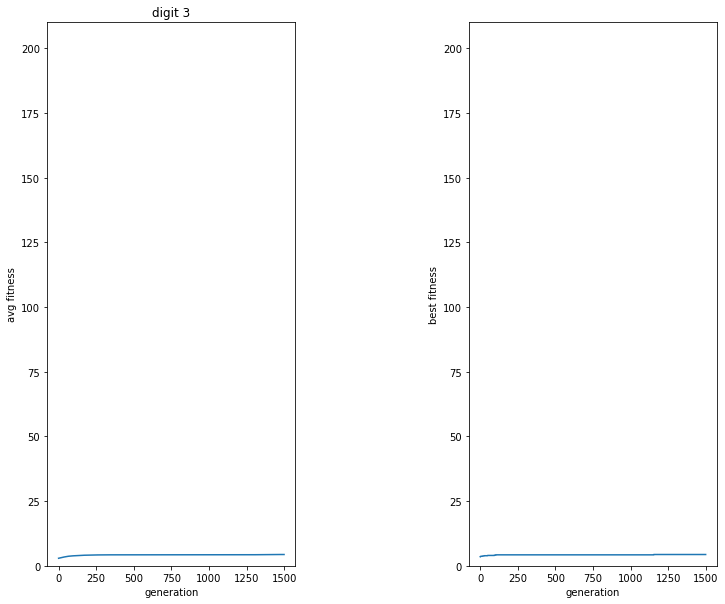

In [9]:
fig = plt.figure(figsize=(12,10))
fig.subplots_adjust(hspace=1,wspace=0.7)
print(0,'.',sep='')
sol_num = []
i = 3
ea.DIGIT=i
(generation_profile, 
avg_fitness_profile, 
best_fitness_profile, 
best_ind_pheno_profile) = ea.train_evolve(mutation=ea.swap_mutation,
            crossover=ea.edge_recombination,
            parent_sel=ea.from_population_best_parents_select, 
            get_parents_pair_method=ea.get_parents_pair_nodup,
            population_sel=ea.best_population_select, 
            population_init=ea.population_init, 
            population_terminate=ea.population_terminate, 
            vertices=sequence_num,
            desired_pheno=low_res_drawing_gray,
            fitness_func=ea.fitness_func,
            geno2pheno=ea.geno2pheno)
plt.subplot(1,2,1)
plt.plot(generation_profile,avg_fitness_profile)
plt.title('digit '+str(ea.DIGIT))
plt.ylabel('avg fitness')
plt.xlabel('generation')
plt.ylim(0,(ppg.LOW_RESOLUTION_IMG_SIZE**2) *2 +10);

plt.subplot(1,2,2)
plt.plot(generation_profile,best_fitness_profile)
plt.ylabel('best fitness')
plt.xlabel('generation')
plt.ylim(0,(ppg.LOW_RESOLUTION_IMG_SIZE**2) *2 +10);
sol_num.append(best_ind_pheno_profile[-1])

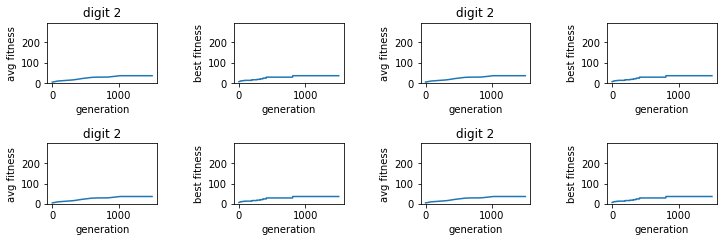

In [17]:
fig = plt.figure(figsize=(12,10))
fig.subplots_adjust(hspace=1,wspace=0.7)

for i in range(ppg.NO_SYMBOLS+1):
    plt.subplot(5,4,2*i+1)
    plt.plot(generation_profile,avg_fitness_profile)
    plt.title('digit '+str(ea.DIGIT))
    plt.ylabel('avg fitness')
    plt.xlabel('generation')
    plt.ylim(0,(ppg.LOW_RESOLUTION_IMG_SIZE**2) *2 + 10);
    
    plt.subplot(5,4,2*i+2)
    plt.plot(generation_profile,best_fitness_profile)
    plt.ylabel('best fitness')
    plt.xlabel('generation')
    plt.ylim(0,(ppg.LOW_RESOLUTION_IMG_SIZE**2) *2 + 10);
    
    sol_num.append(best_ind_pheno_profile[-1])

[(11, 11), (11, 10), (11, 9), (11, 8), (8, 9), (8, 5), (9, 5), (7, 1), (9, 4), (9, 3), (9, 2), (7, 2), (8, 2), (8, 3), (8, 4), (8, 8), (4, 7), (2, 10), (3, 8), (1, 11), (2, 9), (6, 8), (7, 10), (7, 6), (10, 10), (10, 8), (6, 9), (8, 10), (7, 8), (3, 7), (5, 7), (7, 9), (6, 7), (3, 9), (4, 8), (5, 8), (8, 7), (7, 11), (7, 7), (1, 10), (8, 6), (8, 1)]


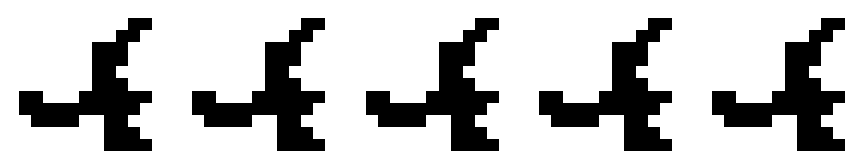

In [15]:
df = []
plt.figure(figsize=(ppg.PLOT_WIDTH, ppg.PLOT_HEIGHT))
for i in range(len(sol_num)):
    plt.subplot(2,5,i+1)
    plt.imshow(seqeval.draw_digit(sol_num[i], ppg.LOW_RESOLUTION_IMG_SIZE),cmap='gray')
    plt.axis('off')
    df.append(pd.DataFrame(sol_num[i], columns=['x','y']))
    if i ==2:
        print(sol_num[i])
    

In [18]:
# sol_num